# Learning Outcomes
- Geometric transformation
    - rotation
    - translation
    - affine transformation
    - perspective transformation

- Some basic drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text

- Bitwise operation
    - OR
    - XOR
    - AND
    - NOT

- Convolution: sliding window performing linera combination
    - Image smoothing (denoising)
    - Sharpening
    - at the heart of CNN
    - other effects

## Setup

In [1]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric transformation

## Translation

In [9]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img(f"translation tx: {tx}, ty: {ty}", dst)

## Rotation

In [12]:
# define M: center, angle and scale
yc, xc = h // 2, w // 2

angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

## Custom affine transform

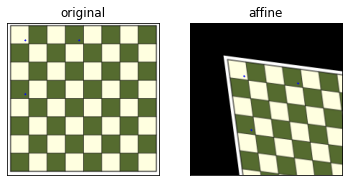

In [13]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

h, w = img.shape[:2]

p0 = np.float32([[25, 25],  [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img, M, (w, h))

plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine")
plt.show()

In [14]:
dst[75, 75, :]

array([  0,   0, 255], dtype=uint8)

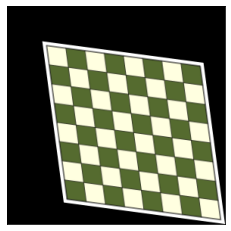

In [15]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

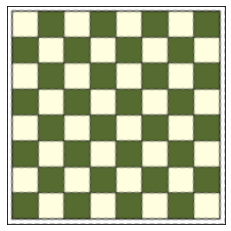

In [16]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restored = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restored)

## Perspective transform

In [17]:
img = cv.imread("images/name_card_sample.webp")
img_copy = img.copy()
show_img("img", img, adjust=True)

In [33]:
# get the 4 points
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(118, 107)
(764, 47)
(911, 265)
(73, 384)


In [2]:
!pip install scipy

                                              0.0/44.0 MB ? eta -:--:--
                                              0.1/44.0 MB 1.7 MB/s eta 0:00:27
                                              0.2/44.0 MB 2.3 MB/s eta 0:00:20
                                              0.5/44.0 MB 3.5 MB/s eta 0:00:13
                                              0.8/44.0 MB 4.1 MB/s eta 0:00:11
                                              1.0/44.0 MB 4.4 MB/s eta 0:00:10
     -                                        1.3/44.0 MB 4.4 MB/s eta 0:00:10
     -                                        1.3/44.0 MB 3.9 MB/s eta 0:00:12
     -                                        1.3/44.0 MB 3.8 MB/s eta 0:00:12
     -                                        1.8/44.0 MB 4.2 MB/s eta 0:00:10
     -                                        2.0/44.0 MB 4.3 MB/s eta 0:00:10
     -                                        2.2/44.0 MB 4.3 MB/s eta 0:00:10
     --                                       2.3/44.0 MB 4


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from scipy.spatial.distance import euclidean

In [34]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv. warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("warp", warp)

## Drawing Functions

In [58]:
# Line
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [38]:
img_copy = img.copy()

cv.line(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

In [39]:
# circle
img_copy = img.copy()

cv.circle(img_copy, (145, 50), 40, (0, 0, 255), 2, cv.LINE_AA)
show_img("circle", img_copy)

In [42]:
# ellipse
img_copy = img.copy()
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 180, (100, 0, 100), 2, cv.LINE_AA)
show_img("ellipse", img_copy)

In [44]:
# rectangle
img_copy = img.copy()

cv.rectangle(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

In [59]:
# text
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15, 145), cv.FONT_HERSHEY_SIMPLEX, 0.65, (200, 0, 50), 2)
show_img("text", img_copy)

### create a custom drawing board
Trackbar function, mouse callback function.

In [60]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, GREEN, BLUE, CYAN, MAGENTA, YELLOW, WHITE)

# create a trackbar function, mouse callback function, while loop to show template
def nothing(x):
    pass

p0=p1 = (0, 0)

def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)

        d = cv.getTrackbarPos(tr1_name, wn)
        if d == 0:
            d=-1
        i = cv.getTrackbarPos(tr2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)
        
wn = "window"
tr1_name = "thickness"
tr2_name = "color"
img = np.zeros((400, 400, 3), dtype=np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tr1_name, wn, 0, 10, nothing)
cv.createTrackbar(tr2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while (1):
    cv.imshow(wn, img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

## Draw a bulleye image

In [70]:
img = np.zeros((400, 400), dtype=np.uint8)

yc, xc = img.shape[0] // 2, img.shape[1] //2
radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)

cv.putText(img, "Bulleye", (20, 375), cv.FONT_HERSHEY_SIMPLEX, 0.65, 255, 2)

show_img("img", img)

## Bitwise Operation

In [72]:
rect = np.zeros((400,400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [74]:
# AND
res_AND = cv.bitwise_and(rect, circle)
show_img('AND', res_AND)

In [75]:
# OR
res_or = cv.bitwise_or(rect, circle)
show_img("OR", res_or)

In [76]:
# XOR
res_xor = cv.bitwise_xor(rect, circle)
show_img("XOR", res_xor)

In [78]:
# NOT
res_not = cv.bitwise_not(rect)
show_img("NOt", res_not)

In [80]:
img = cv.imread("images/dog.jfif")

h, w = img.shape[:2]

mask = np.zeros((h, w), dtype = np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

res = cv. bitwise_and(img, img, mask = mask)

show_img("res", res)

## Convolution

In [82]:
# identity kernel
img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3, 3))
kernel[1, 1] = 1

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

In [83]:
# sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1, kernel)

cv.imshow('original', img)
show_img("sharpen", dst)

In [85]:
# blur
kernel = np.ones((5,5)) / 25

blur = cv.filter2D(img, -1, kernel)

dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)

show_img("unsharp_masking", dst)

 4 function to perform image blurring:
 - `cv.blur`: mean average filter
 - `cv.GaussianBlur`: Gaussian filter, suitable for gaussian noise
 - `cv.medianFilter`: median filter, useful to eliminate salt and pepper noise
 - `cv.bilateralFilter`: edge-preserving filter

## Weekly Activity 1
Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries `imutils`.
- Modify the transformation matrix.

In [14]:
!pip install imutils

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=3223aaac8768813f17fffa229bd82b1805e90b1376a99a4d7db47c4a9e9282ba
  Stored in directory: c:\users\joseph tee\appdata\local\pip\cache\wheels\31\d0\2c\87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import imutils

img = cv.imread("images/lena.jfif")

(h, w) = img.shape[:2]

angle = 45

rotated_img = imutils.rotate_bound(img, angle)

show_img("Rotated Image", rotated_img)

## Weekly Activity 2
Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are `cv.bitwise_and()`, `cv.bitwise_or()` and `cv.bitwise_not()`. You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info.

In [16]:
img = cv.imread("images/flower.jfif")
img2 = cv.imread("images/native-bee.png")

# create mask of flower
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img_gray, 70, 255, cv.THRESH_BINARY)
mask = mask.astype(np.uint8)
mask_inv = cv.bitwise_not(mask)
mask_inv = mask_inv.astype(np.uint8)

h, w = img.shape[:2]

ROI = img2[0:h, 0:w]

# extract flower from img
img_extract = cv.bitwise_and(img, img, mask = mask)

# black out the region of the flower that will be placed
ROI_extract = cv.bitwise_and(ROI, ROI, mask = mask_inv)

# blend both img
dst = cv.add(ROI_extract, img_extract)
img2[0:h, 0:w] = dst

show_img("img", img2)

## Weekly Activity 3
Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png'

In [27]:
img = cv.imread("images/native-bee.png")
img_copy = img.copy()
img_copy2 = img.copy()

# sharpening kernel of aperture size 3
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# sharpening kernel of aperture size 5
kernel2 = np.array([[-1]*5]*5)
kernel2[2, 2] = 25

dst = cv.filter2D(img_copy, -1, kernel)
dst2 = cv.filter2D(img_copy2, -1, kernel2)

cv.imshow('original', img)
show_img("sharpen with aperture size 3", dst)
show_img("sharpen with aperture size 5", dst2)

# Comment:
# sharpening kernel of aperture size 3:
# The edges of the bee and flower are sharpen. The details of the bee and flower are more clearer compare to original image
# sharpening kernel of aperture size 5:
# The edges of the bee and flower are aggressively sharpen. It lead to noise amplification.

## Weekly Activity 4
Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [ ]:
img = cv.imread("images/noise_lena.jpg")

blur = cv.blur(img, (5, 5))

gaussian_blur = cv.GaussianBlur(img, (5, 5), 0)

median_filter = cv.medianBlur(img, 5)

bilateral_filter = cv.bilateralFilter(img, 5, 75, 75)

cv.imshow("Ori img", img)
cv.imshow("Blur", blur)
cv.imshow("Gaussian blur", gaussian_blur)
cv.imshow("Median filter", median_filter)
cv.imshow("Bilateral filter", bilateral_filter)
cv.waitKey(0)
cv.destroyAllWindows()

# Comment
# Blur: The img noise is reduced and blurred.
# Gaussian blur: The img noise is slightly reduced and blurred.
# Median Blur: The img noise is gone. The edge of the img is smooth and not clear.
# Bilateral Filter: The img noise is not reduced. The edges of the img and noise are sharpen.
# The type of noise present on img is salt-and-pepper noise since using median blur able to eliminate all the img noise.